# Building a Securities’ Dataset      E.Gallo

In [1]:
import pandas as pd
import json
import requests
import time
import threading
import csv
import matplotlib.pyplot as plt
import numpy as np

# 2.a
### Modify the program to store the results in various .json files (a file for each response).

In [9]:
symbols = [ 'AAPL' , 'GE' , 'GM' ]
urls = []


for symbol in symbols:
    urls.append( 'https://financialmodelingprep.com/api/v3/historical-price-full/'+ symbol +'?serietype=line' )

start = time.time()
for url in urls:
    try :
        response = requests.get(url)
        # If the response is successful, no Exception will be raised
        response.raise_for_status()
        # I load the text of the .json files downloaded in a dictionary        
        res = json.loads(response.text)
        
    except Exception as exception:
        print ( 'An exception occurred: ' + str (exception))
    else :
        print ( 'Success!' )
        
    # I create a .json file in write mode, to put inside the data downloaded    
    with open(res['symbol'] + '.json', 'w') as outfile:
        json.dump(res, outfile)
        
end = time.time()
print ( 'Took %.3f seconds' % (end - start))

Success!
Success!
Success!
Took 3.224 seconds


# 2.b 
### Modify the program to achieve concurrency using Threads.
### i) Do you get a faster (or slower) solution? Evaluate the execution time difference (sequential vs threading).

In [2]:
# Create a threading class to see if the program will be faster

class FinanceThread(threading.Thread):
    def __init__(self, symb):
        super().__init__()
        self.symbols = symb
        
    def run(self):
        finance(self.symbols)
        

def finance(symbols):
    urls = []
    for symbol in symbols:
        urls.append( 'https://financialmodelingprep.com/api/v3/historical-price-full/'+ symbol +'?serietype=line' )

    for url in urls:
        try :
            response = requests.get(url)
            response.raise_for_status()
                 
        except Exception as exception:
            print ( 'An exception occurred: ' + str (exception))
        else :
            print ( 'Success!' )
            #print(response.text)
            # I will not print the text of the download since it's very heavy and reduce a lot jupyter's notebook performaces


In [3]:
# Evaluate the time with sequential programming

symbols = [['AAPL', 'GE', 'GM'], ['VXX', 'RSX', 'IGV'], ['INDA', 'IEO', 'MTUM']]
start = time.time()
for symbol in symbols:
    finance(symbol)
end = time.time()
print ( 'Took %.3f seconds' % (end - start))

Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Took 5.919 seconds


In [4]:
# Evaluate the time with multi-threading programming

symbols = [['AAPL', 'GE', 'GM'], ['VXX', 'RSX', 'IGV'], ['INDA', 'IEO', 'MTUM']]
start = time.time()
threads = []
for symbol in symbols:
    thread = FinanceThread(symbol)
    thread.start()
    threads.append(thread)
for thread in threads:
    thread.join()
end = time.time()

print ( 'Took %.3f seconds' % (end - start))


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Took 2.462 seconds


The result with **multi-threading** is very good, in fact we gained more than $50\%$ of the time: 
- from $5.919 sec$ in **sequential** programming
- to $2.462 sec$ in **multi-threading** programming

We can explain those results since **multi-threading** works well when in the program we have some **waiting**(like in this program when we have to wait for response from internet)that allow us to achieve **concurrency**. 

# 2.c
### Run the program with the input given by a list of 10 securities

In [7]:
# Run the program with 10 securities

symbols = [['AAPL', 'GE'],[ 'GM','ECH'],[ 'RSX', 'IGV'],['INDA', 'IEO'],[ 'MTUM', 'REM']]
start = time.time()
threads = []
for symbol in symbols:
    thread = FinanceThread(symbol)
    thread.start()
    threads.append(thread)
for thread in threads:
    thread.join()
end = time.time()

print ( 'Took %.3f seconds' % (end - start))

Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Took 1.759 seconds


# 2.d
### Write a python program able to load the contents of all the downloaded files and to merge all the contents in a unique .csv file, after setting the proper header (symbol, close, date).

In [13]:
symbols = [ 'AAPL' , 'GE' , 'GM' ]
urls = []
csv_list = [['symbol', 'close', 'date']]

for symbol in symbols:
    url = 'https://financialmodelingprep.com/api/v3/historical-price-full/'+ symbol +'?serietype=line'
    response = requests.get(url)
    response.raise_for_status()
    res = json.loads(response.text)# {'symbol': 'GM', 'historical': [{'date': '2010-11-18', 'close': 34.19},...
    
    hist = res['historical']# [{'date': '2010-11-18', 'close': 34.19}, {'date': '2010-11-19', 'close': 34.26},...
    
    for i in hist:# {'date': '2010-11-18', 'close': 34.19}...
        
        cs = [symbol, i['close'], i['date']]# ['GM', 34.19, '2010-11-18']
        csv_list.append(cs)

# I create a .csv file in write mode, to put inside the data created
with open('securities.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(csv_list)
    

# 2.e
### Load the data in a Python Dataframe and extract some information (of your choice).

In [15]:
# Create a dataframe 
df = pd.DataFrame(csv_list, columns = csv_list[0])
df.head()

,symbol,close,date
0,symbol,close,date
1,AAPL,1.54,1989-09-19
2,AAPL,1.59,1989-09-20
3,AAPL,1.6,1989-09-21
4,AAPL,1.6,1989-09-22


In [16]:
# I erase the first row that I used to create the csv file
df = df[1:]

df.head()


,symbol,close,date
1,AAPL,1.54,1989-09-19
2,AAPL,1.59,1989-09-20
3,AAPL,1.6,1989-09-21
4,AAPL,1.6,1989-09-22
5,AAPL,1.62,1989-09-25


In [18]:
# Transform in a 'datetime' object the 'date' column 

df['date'] = pd.to_datetime(df['date'])
df.head()

,symbol,close,date
1,AAPL,1.54,1989-09-19
2,AAPL,1.59,1989-09-20
3,AAPL,1.6,1989-09-21
4,AAPL,1.6,1989-09-22
5,AAPL,1.62,1989-09-25


In [19]:
# Change the index using dates and then get rid of the 'date' column
df.index = df['date']
del df['date']
df.tail()

,symbol,close
date,,
2020-04-20,GM,22.38
2020-04-21,GM,21.24
2020-04-22,GM,21.3
2020-04-23,GM,21.52
2020-04-24,GM,21.95


In [21]:
# To make better analysis i think that every symbol should be a column on its own, so I create them
aapl = df[df['symbol'] == 'AAPL']['close']
ge = df[df['symbol'] == 'GE']['close']
gm = df[df['symbol'] == 'GM']['close']
df['AAPL'] = aapl
df['GE'] = ge
df['GM'] = gm
df.tail()

,symbol,close,AAPL,GE,GM
date,,,,,
2020-04-20,GM,22.38,276.93,6.51,22.38
2020-04-21,GM,21.24,268.37,6.48,21.24
2020-04-22,GM,21.3,276.1,6.43,21.3
2020-04-23,GM,21.52,275.03,6.52,21.52
2020-04-24,GM,21.95,282.97,6.26,21.95


In [22]:
# Delete old columns
del df['symbol']
del df['close']
df.tail()

,AAPL,GE,GM
date,,,
2020-04-20,276.93,6.51,22.38
2020-04-21,268.37,6.48,21.24
2020-04-22,276.1,6.43,21.3
2020-04-23,275.03,6.52,21.52
2020-04-24,282.97,6.26,21.95


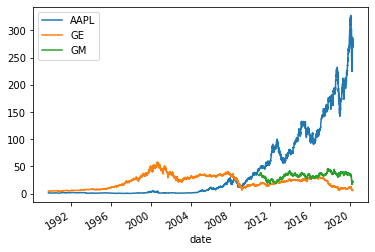

In [24]:
# Make a plot 
df.plot()

Text(0, 0.5, 'market value')

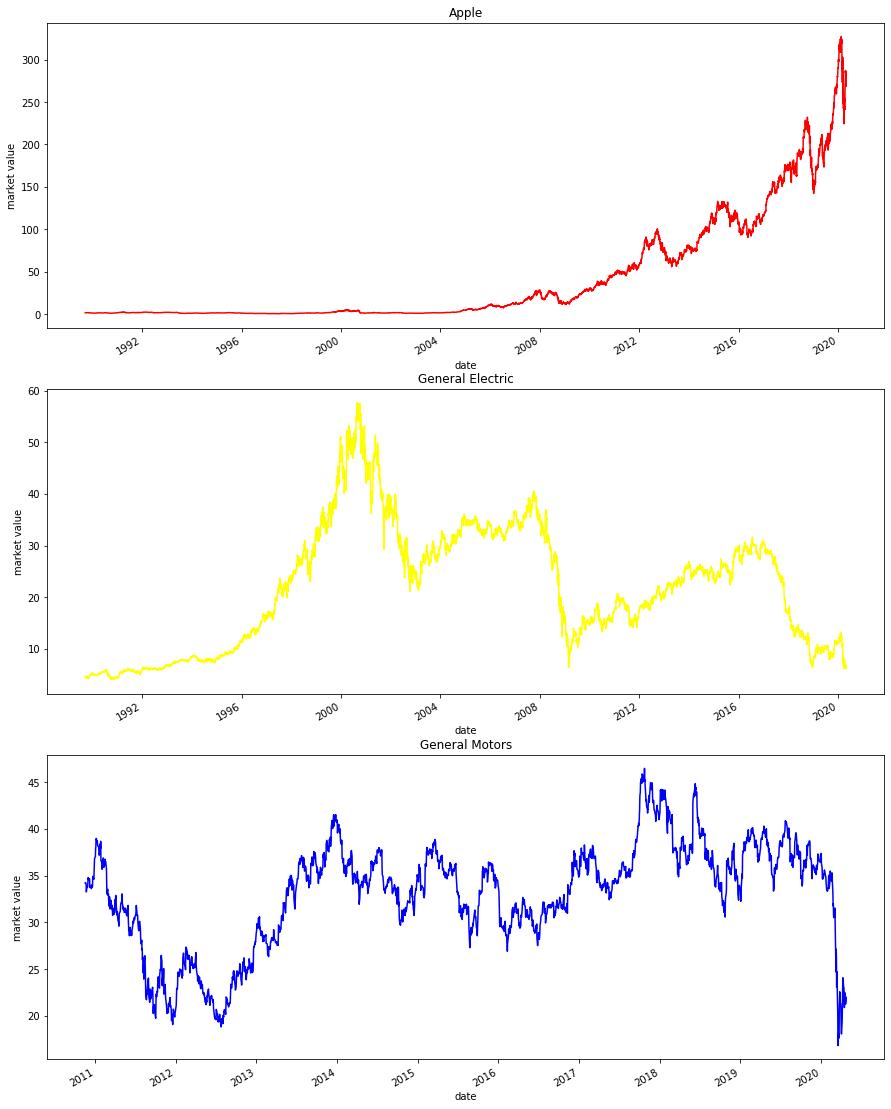

In [26]:
# I want to see every security by itself so i plot them separately
plt.figure(figsize=(15,3))
plt.subplots_adjust(top = 5)# adjust distance between rows

ax = plt.subplot(3,1,1)
df['AAPL'].plot(color = 'red')
plt.title('Apple')
plt.ylabel('market value')

ax = plt.subplot(3,1,2)
df['GE'].plot(color = 'yellow')
plt.title('General Electric')
plt.ylabel('market value')

ax = plt.subplot(3,1,3)
df['GM'].plot(color = 'blue')
plt.title('General Motors')
plt.ylabel('market value')

In [35]:
# Various descriptive statistics
for i in df.columns:
    print('\n'+'Maximum value reached by '+ i + ' is: ' + '{:.2f}'.format(df[i].max()))
    print('Minimum value reached by '+ i + ' is: ' + '{:.2f}'.format(df[i].min()))
    print('Average value reached by '+ i + ' is: ' + '{:.2f}'.format(np.mean(df[i])))



Maximum value reached by AAPL is: 327.20
Minimum value reached by AAPL is: 0.46
Average value reached by AAPL is: 53.06

Maximum value reached by GE is: 57.69
Minimum value reached by GE is: 4.05
Average value reached by GE is: 21.67

Maximum value reached by GM is: 46.48
Minimum value reached by GM is: 16.80
Average value reached by GM is: 33.03


In [53]:
# I can se how those company have lost since the start of the coronavirus pandemic
df.loc['20191231':]

,AAPL,GE,GM
date,,,
2019-12-31,293.65,11.16,36.6
2020-01-02,300.35,11.93,37.38
2020-01-03,297.43,11.97,36.32
2020-01-06,299.8,12.14,35.84
2020-01-07,298.39,12.05,35.15
...,...,...,...
2020-04-20,276.93,6.51,22.38
2020-04-21,268.37,6.48,21.24
2020-04-22,276.1,6.43,21.3


we can see that: 
- **Apple** have lost $\frac{293.65-282.97}{293.65} 100 = 3.63\% $
- **General Electric** have lost $\frac{11.16-6.26}{11.16} 100 = 43.9\% $
- **General Motors** have lost $\frac{36.6-21.95}{36.6} 100 = 40\% $